# Homework 2

This notebook is used to analyze the data created in `get_reddit_posts.py`.

## Imports

In [1]:
import pandas as pd

## Read the data


In [2]:
comments_df = pd.read_csv('data/comments_df_10.csv')

# print the first five rows
comments_df.head()

,Unnamed: 0,id,score,created_utc,body,parent_id,author
0,0,dneqzng,6857,1.506195e+09,That girl is more frat than every guy in that ...,t3_71zf07,Only_Validates_Names
1,1,dnen7m2,12095,1.506190e+09,I've watched this video about 10 times now and...,t3_71zf07,scooch_mgooch
2,2,dner7ni,13611,1.506195e+09,Someday she is going to be living in suburbia ...,t3_71zf07,silentjay01
3,3,dnep6b6,4768,1.506193e+09,So Steve Austin has a daughter who goes to col...,t3_71zf07,caddy_gent
4,4,dneszm4,957,1.506198e+09,AND catches one handed.,t3_71zf07,[deleted]


# Clean the data
We will clean the data by removing posts that have no body.

In [18]:
comments_df.dropna(inplace=True)

## Convert dates
We will convert dates from Unix time to a more readable format.

In [3]:
# from: https://stackoverflow.com/questions/19231871/
comments_df['created_time'] = pd.to_datetime(comments_df['created_utc'], unit='s')

## 3.3 Get Post by Day of Week
The line below will create a new column called `dow` that contains the day of the week for each post.

In [5]:
comments_df['dow'] = comments_df['created_time'].dt.day_name()

Now, we will plot the total number of comments for each day of the week.

<Axes: xlabel='dow'>

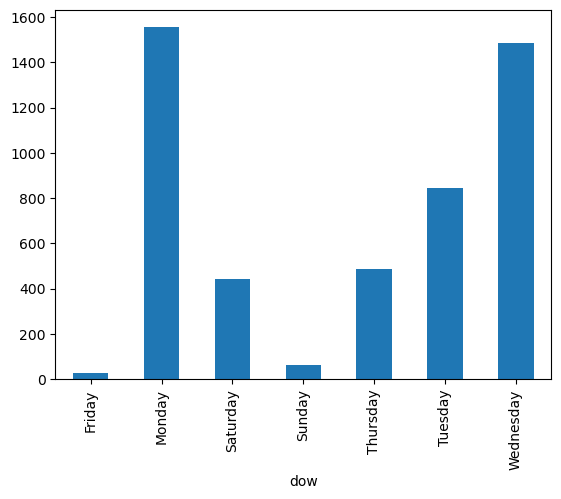

In [6]:
comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

The days are not ordered correctly. We can fix this by using the `Categorical` type.

In [7]:
comments_df['dow'] = pd.Categorical(comments_df['dow'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

<Axes: xlabel='dow'>

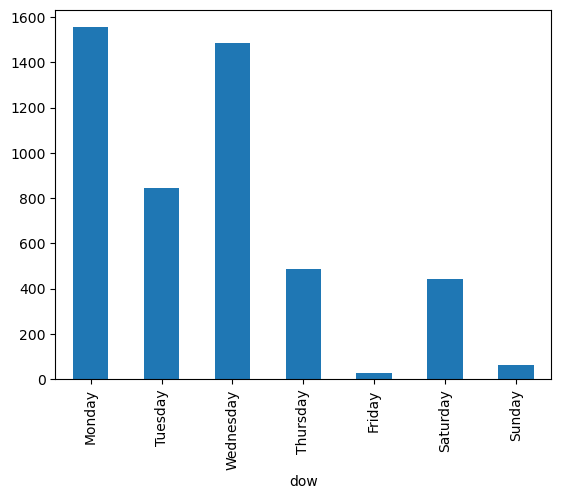

In [8]:
comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

[Text(0.5, 0, 'Day Of The Week'),
 Text(0, 0.5, 'Total Number of Posts'),
 Text(0.5, 1.0, 'Reddit Posts Per Day of the Week')]

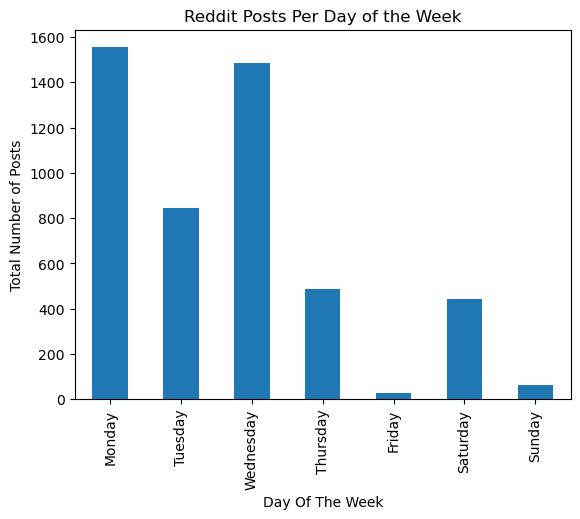

In [11]:
dow_plot = comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

dow_plot.set(xlabel="Day Of The Week", ylabel="Total Number of Posts",
             title="Reddit Posts Per Day of the Week")

# dow_plot.get_figure() # this prints a duplicate plot

# Counting Words

In [16]:

from collections import Counter 
results = Counter() 
comments_df['body'].str.split().apply(results.update)
print(results.most_common(25))

[('the', 3580), ('to', 2454), ('a', 2411), ('I', 2162), ('and', 1913), ('of', 1660), ('is', 1327), ('in', 1171), ('you', 1157), ('that', 1126), ('it', 1009), ('for', 894), ('was', 763), ('on', 660), ('this', 640), ('but', 588), ('my', 569), ('be', 550), ('with', 534), ('like', 530), ('have', 509), ('are', 500), ('just', 469), ('not', 468), ('he', 429)]


If we convert the text to lower first, we get more accurate counts.

In [17]:
results = Counter() 
# convert string to lower, split on whitespace, then update the counts
comments_df['body'].str.lower().str.split().apply(results.update)
print(results.most_common(25))

[('the', 3925), ('to', 2498), ('a', 2487), ('i', 2267), ('and', 2063), ('of', 1672), ('you', 1370), ('is', 1367), ('that', 1225), ('in', 1218), ('it', 1189), ('for', 923), ('this', 817), ('was', 778), ('but', 714), ('on', 673), ('my', 673), ('he', 568), ('like', 563), ('be', 561), ('with', 544), ('not', 539), ('are', 539), ('just', 527), ('have', 525)]
